# Carprice 

In [1]:
import kagglehub
import os
import pandas as pd

## Load dataset

In [2]:
path = kagglehub.dataset_download("CooperUnion/cardataset",force_download=False)
df = pd.read_csv(os.path.join(path, "data.csv"))
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Clean data

In [3]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [4]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Eploratory Data Analysis

In [5]:
for col in df.select_dtypes(exclude=["object"]).columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"first 5: {df[col].unique()[:5]}")
    print()

year: 28 unique values
first 5: [2011 2012 2013 1992 1993]

engine_hp: 356 unique values
first 5: [335. 300. 230. 320. 172.]

engine_cylinders: 9 unique values
first 5: [ 6.  4.  5.  8. 12.]

number_of_doors: 3 unique values
first 5: [ 2.  4.  3. nan]

highway_mpg: 59 unique values
first 5: [26 28 27 25 24]

city_mpg: 69 unique values
first 5: [19 20 18 17 16]

popularity: 48 unique values
first 5: [3916 3105  819  617 1013]

msrp: 6049 unique values
first 5: [46135 40650 36350 29450 34500]



### Distribution of price

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

Text(0.5, 1.0, 'Distribution of Car Prices')

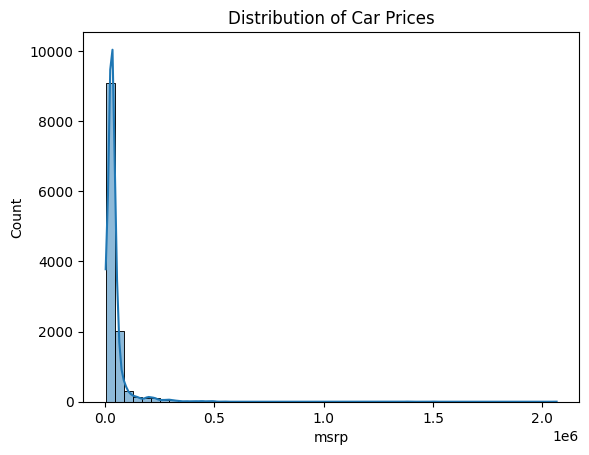

In [7]:
sns.histplot(df.msrp, bins=50, kde=True)
plt.title("Distribution of Car Prices")

<Axes: xlabel='msrp', ylabel='Count'>

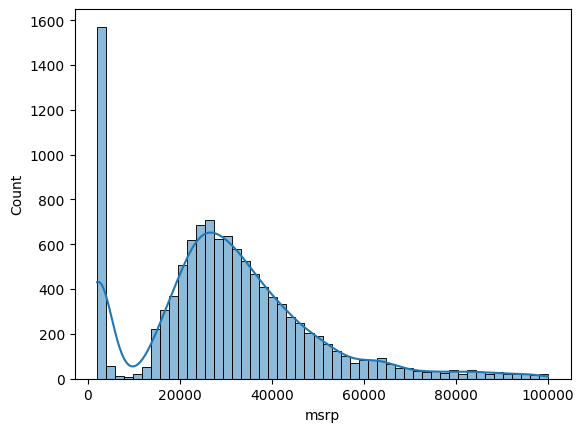

In [8]:
sns.histplot(df.msrp[df.msrp< 100_000], bins=50, kde=True)

Text(0.5, 1.0, 'Distribution of Log Car Prices')

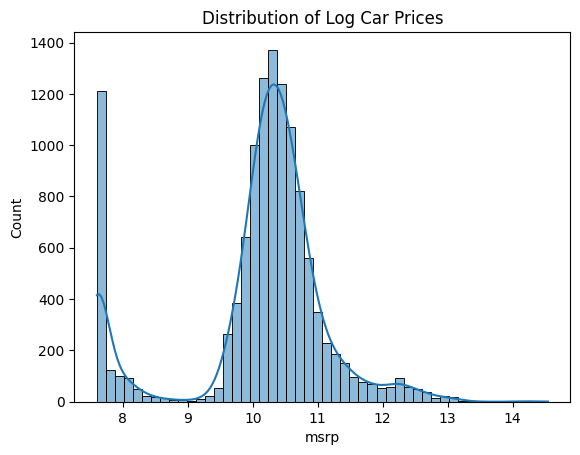

In [9]:
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50, kde=True)
plt.title("Distribution of Log Car Prices")


### Missing values

In [10]:
df.isnull().sum()   

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up the validation framework

In [11]:
n = len(df)

n_test = int(0.2 * n)  
n_val = int(0.2 * n)
n_train = n - n_test - n_val 

n_train, n_val, n_test

(7150, 2382, 2382)

In [12]:
df_shuf = df.sample(frac=1, random_state=2).reset_index(drop=True)
df_train = df_shuf.iloc[:n_train]
df_val = df_shuf.iloc[n_train:n_train + n_val].reset_index(drop=True)
df_test = df_shuf.iloc[n_train + n_val:].reset_index(drop=True)
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [13]:
# idx = np.arange(n)
# np.random.seed(2)
# np.random.shuffle(idx)
# df_train = df.iloc[idx[:n_train]]
# df_val = df.iloc[idx[n_train:n_train + n_val]]
# df_test = df.iloc[idx[n_train + n_val:]]
# df_train = df_train.reset_index(drop=True)
# df_val = df_val.reset_index(drop=True)
# df_test = df_test.reset_index(drop=True)
# df_train.head()

### Extract target values

In [14]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [15]:
del df_train["msrp"]
del df_val["msrp"]
del df_test["msrp"]

## Linear Regression

In [16]:
def train_linear_regression(X, y,reg = 0.0):
    X = np.asarray(X)
    y = np.asarray(y)
    X = np.column_stack([np.ones(X.shape[0]), X])  # add bias term
    XTX = X.T@X + reg * np.eye(X.shape[1])
    w = np.linalg.inv(XTX)@(X.T)@y
    return w

In [17]:
def predict_linear_regression(X, w):
    X = np.asarray(X)
    X = np.column_stack([np.ones(X.shape[0]), X])  # add bias term
    y_pred = X @ w
    return y_pred

## Car-price baseline model

In [18]:
df.select_dtypes(exclude=["object"]).columns

Index(['year', 'engine_hp', 'engine_cylinders', 'number_of_doors',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [19]:
base = ['engine_hp', 'engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [20]:
def prepare_X(df):
    X = df[base].fillna(0).values
    return X

X_train = prepare_X(df_train)

In [21]:
w = train_linear_regression(X_train, y_train)
w

array([ 7.92725739e+00,  9.70589522e-03, -1.59103494e-01,  1.43792133e-02,
        1.49441072e-02, -9.06908672e-06])

In [22]:
y_pred = predict_linear_regression(X_train, w)

Text(0.5, 1.0, 'Distribution of Predicted Log Car Prices')

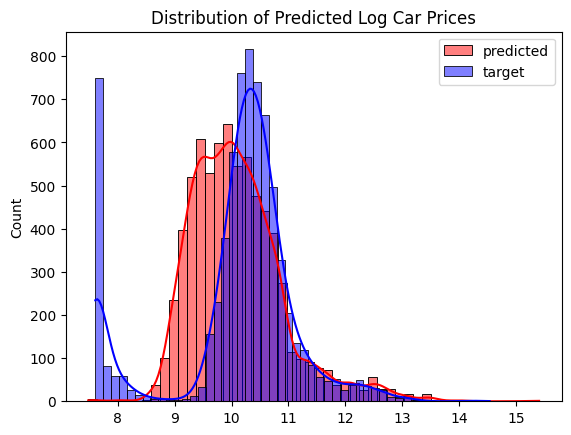

In [23]:
sns.histplot(y_pred,color = 'red', bins=50, kde=True,alpha=0.5,label = 'predicted')
sns.histplot(y_train,color = 'blue', bins=50, kde=True,alpha=0.5,label = 'target')
plt.legend()
plt.title("Distribution of Predicted Log Car Prices")

## RMSE

In [24]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred) ** 2)).item()

In [ ]:
rmse(y_train, y_pred)

0.7554192603920132

## Validating the model

In [26]:
X_val = prepare_X(df_val)
y_pred = predict_linear_regression(X_val, w)

rmse(y_val, y_pred)

0.761653099130156

## Simple feature engineering

We simply add age variable

In [27]:
def prepare_X(df):
    df = df.copy()
    df['age'] = df.year.max() - df.year
    feats = base + ['age']
    X = df[feats].fillna(0).values
    return X


#### Train

In [28]:
X_train = prepare_X(df_train)

w = train_linear_regression(X_train, y_train)
y_pred = predict_linear_regression(X_train, w)
rmse(y_train, y_pred)

0.5175055465840046

Text(0.5, 1.0, 'Distribution of Predicted Log Car Prices on training set')

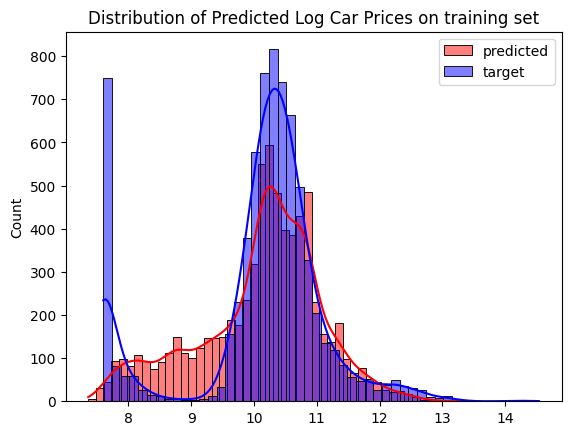

In [29]:
sns.histplot(y_pred,color = 'red', bins=50, kde=True,alpha=0.5,label = 'predicted')
sns.histplot(y_train,color = 'blue', bins=50, kde=True,alpha=0.5,label = 'target')
plt.legend()
plt.title("Distribution of Predicted Log Car Prices on training set")

#### validation

In [30]:
X_val = prepare_X(df_val)
y_pred = predict_linear_regression(X_val, w)
rmse(y_val, y_pred)

0.5172055461058299

Text(0.5, 1.0, 'Distribution of Predicted Log Car Prices on test set')

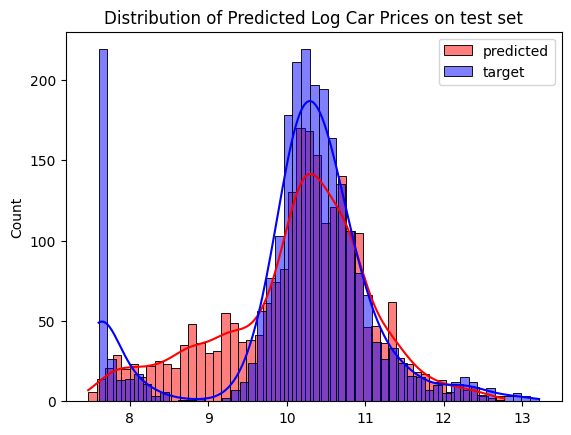

In [31]:
sns.histplot(y_pred,color = 'red', bins=50, kde=True,alpha=0.5,label = 'predicted')
sns.histplot(y_val,color = 'blue', bins=50, kde=True,alpha=0.5,label = 'target')
plt.legend() 
plt.title("Distribution of Predicted Log Car Prices on test set")

## Categorical Variables

In [32]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [33]:
def prepare_X(df):
    df = df.copy()
    df['age'] = df.year.max() - df.year
    feats = base + ['age']
    for i in [2,3,4]:
        df[f"num_doors_{i}"] = (df.number_of_doors == i).astype(int)
        feats.append(f"num_doors_{i}")
    
    categorical = ['make','engine_fuel_type','transmission_type','driven_wheels', 'market_category',
                   'vehicle_size', 'vehicle_style']
    for c in categorical:
        values = list(df[c].value_counts().index[:5])
        for val in values:
            df[f"{c}_{val}"] = (df[c] == val).astype(int)
            feats.append(f"{c}_{val}")
    X = df[feats].fillna(0).values
    return X


#### Train

In [34]:
X_train = prepare_X(df_train)

w = train_linear_regression(X_train, y_train)
y_pred = predict_linear_regression(X_train, w)
rmse(y_train, y_pred)

25.124429645467256

Text(0.5, 1.0, 'Distribution of Predicted Log Car Prices on training set')

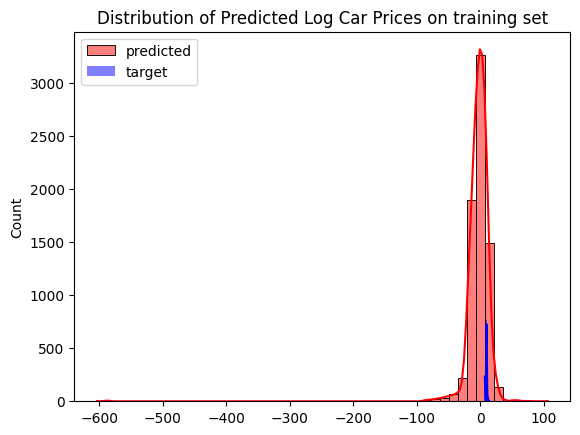

In [35]:
sns.histplot(y_pred,color = 'red', bins=50, kde=True,alpha=0.5,label = 'predicted')
sns.histplot(y_train,color = 'blue', bins=50, kde=True,alpha=0.5,label = 'target')
plt.legend()
plt.title("Distribution of Predicted Log Car Prices on training set")

In [36]:
X_val = prepare_X(df_val)
y_pred = predict_linear_regression(X_val, w)
rmse(y_val, y_pred)

18.14574919062313

Text(0.5, 1.0, 'Distribution of Predicted Log Car Prices on test set')

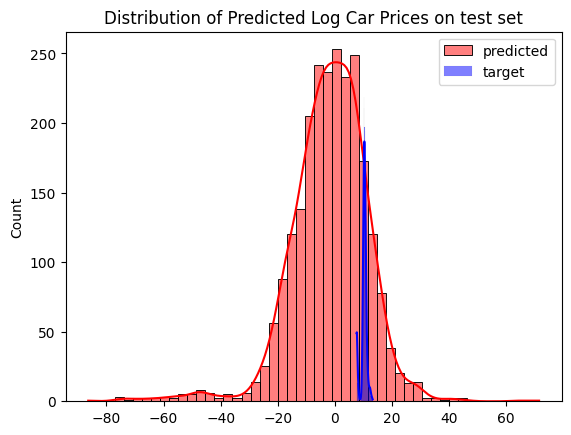

In [37]:
sns.histplot(y_pred,color = 'red', bins=50, kde=True,alpha=0.5,label = 'predicted')
sns.histplot(y_val,color = 'blue', bins=50, kde=True,alpha=0.5,label = 'target')
plt.legend() 
plt.title("Distribution of Predicted Log Car Prices on test set")

#### validation

In [38]:
X_val = prepare_X(df_val)
y_pred = predict_linear_regression(X_val, w)
rmse(y_val, y_pred)

18.14574919062313

Text(0.5, 1.0, 'Distribution of Predicted Log Car Prices on test set')

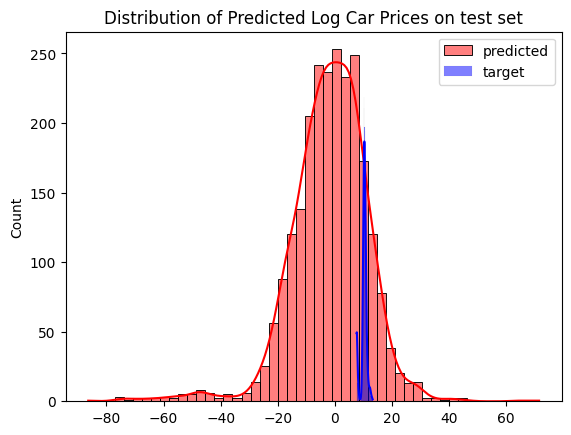

In [39]:
sns.histplot(y_pred,color = 'red', bins=50, kde=True,alpha=0.5,label = 'predicted')
sns.histplot(y_val,color = 'blue', bins=50, kde=True,alpha=0.5,label = 'target')
plt.legend() 
plt.title("Distribution of Predicted Log Car Prices on test set")

## Regularization

In [40]:
categorical_vars = ['make','engine_fuel_type','transmission_type','driven_wheels', 'market_category',
                'vehicle_size', 'vehicle_style']

categories = {}
for c in categorical_vars:
    categories[c]= list(df_train[c].value_counts().head().index)


def prepare_X(df):
    df = df.copy()
    df['age'] = df.year.max() - df.year
    feats = base + ['age']
    for i in [2,3,4]:
        df[f"num_doors_{i}"] = (df.number_of_doors == i).astype(int)
        feats.append(f"num_doors_{i}")

    for c, values in categories.items():
        for val in values:
            df[f"{c}_{val}"] = (df[c] == val).astype(int)
            feats.append(f"{c}_{val}")
    X = df[feats].fillna(0).values
    return X

#### Train

In [41]:
X_train = prepare_X(df_train)

w = train_linear_regression(X_train, y_train,reg=0.01)
y_pred = predict_linear_regression(X_train, w)
rmse(y_train, y_pred)

0.4602099520246485

Text(0.5, 1.0, 'Distribution of Predicted Log Car Prices on training set')

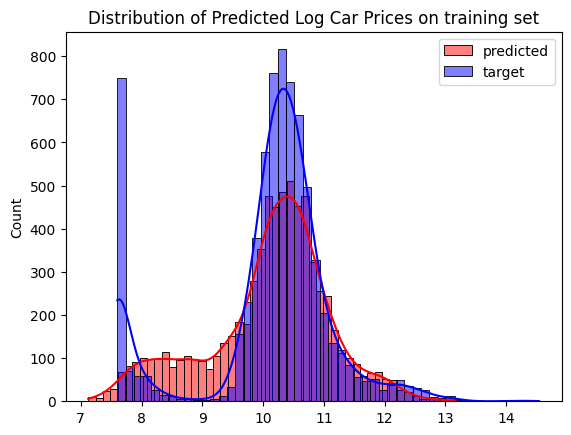

In [42]:
sns.histplot(y_pred,color = 'red', bins=50, kde=True,alpha=0.5,label = 'predicted')
sns.histplot(y_train,color = 'blue', bins=50, kde=True,alpha=0.5,label = 'target')
plt.legend()
plt.title("Distribution of Predicted Log Car Prices on training set")

#### validation

In [43]:
X_val = prepare_X(df_val)
y_pred = predict_linear_regression(X_val, w)
rmse(y_val, y_pred)

0.456521990159498

Text(0.5, 1.0, 'Distribution of Predicted Log Car Prices on test set')

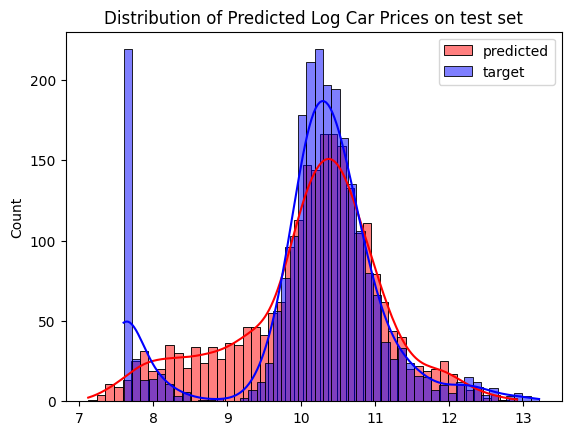

In [44]:
sns.histplot(y_pred,color = 'red', bins=50, kde=True,alpha=0.5,label = 'predicted')
sns.histplot(y_val,color = 'blue', bins=50, kde=True,alpha=0.5,label = 'target')
plt.legend() 
plt.title("Distribution of Predicted Log Car Prices on test set")

### Tunning the model 

In [45]:
for r in [0.0, 0.00_001, 0.0_001, 0.001,0.01, 0.1,1,10]:
    print("Regularization:", r)
    X_train = prepare_X(df_train)

    w = train_linear_regression(X_train, y_train,reg=r)
    
    y_pred = predict_linear_regression(X_val, w)
    score = rmse(y_val, y_pred)
    print("RMSE:", score)
    print("bias term:", w[0])
    print()

Regularization: 0.0
RMSE: 18.239815915661513
bias term: 1490771050477478.8

Regularization: 1e-05
RMSE: 0.456517033264953
bias term: 3.3018558489965324

Regularization: 0.0001
RMSE: 0.4565170658328044
bias term: 6.336852827878064

Regularization: 0.001
RMSE: 0.45651750852633477
bias term: 6.285637034753571

Regularization: 0.01
RMSE: 0.456521990159498
bias term: 6.276608807851224

Regularization: 0.1
RMSE: 0.4565692762998235
bias term: 6.191208619220593

Regularization: 1
RMSE: 0.457220431799308
bias term: 5.63489666798207

Regularization: 10
RMSE: 0.47014569320989474
bias term: 4.283980108964413



In [46]:
r = 0.001
X_train = prepare_X(df_train)

w = train_linear_regression(X_train, y_train,reg=r)

y_pred = predict_linear_regression(X_val, w)
rmse(y_val, y_pred)

0.45651750852633477

## Using the model

### Full Train

In [47]:
df_fulltrain = pd.concat([df_train, df_val]).reset_index(drop=True)

X_fulltrain = prepare_X(df_fulltrain)
y_fulltrain = np.concatenate([y_train, y_val])
w = train_linear_regression(X_fulltrain, y_fulltrain,reg=0.01)
y_pred = predict_linear_regression(X_fulltrain, w)

In [48]:
X_test = prepare_X(df_test)
y_pred = predict_linear_regression(X_test, w)
rmse(y_test, y_pred)

0.4517787580648003

### Predict one car price

In [49]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [ ]:
df_small = pd.DataFrame([car])
X_small = prepare_X(df_small)
y_pred = predict_linear_regression(X_small, w)
y_pred

10.65637561315693

In [58]:
np.expm1(y_pred).item()

42461.457566739264

In [59]:
np.expm1(y_test[20]).item()

35000.00000000001